In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np

data=np.load('/content/drive/MyDrive/data.npy')
target=np.load('/content/drive/MyDrive/target.npy')

In [17]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,Activation,MaxPooling2D
from keras.utils import normalize
from keras.layers import Concatenate
from keras import Input
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

input_shape=(100,100,1)
inp=Input(shape=input_shape)
convs=[]

parrallel_kernels=[3,5,7]

for k in range(len(parrallel_kernels)):

    conv = Conv2D(128, parrallel_kernels[k],padding='same',activation='relu',input_shape=input_shape,strides=1)(inp)
    convs.append(conv)

out = Concatenate()(convs)
conv_model = Model(inputs=inp, outputs=out)

model = Sequential()
model.add(conv_model)

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,input_dim=128,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_5 (Functional)    (None, 100, 100, 384)     11008     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 98, 98, 64)        221248    
_________________________________________________________________
activation_4 (Activation)    (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 47, 47, 32)        18464     
_________________________________________________________________
activation_5 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 32)       

In [18]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [19]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5',monitor='val_loss',verbose=0,save_best_only=True,mode='auto',save_weights_only=True)
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.1)

Epoch 1/20
18/18 [==============================] - 3s 156ms/step - loss: 0.6085 - accuracy: 0.7550 - val_loss: 0.5867 - val_accuracy: 0.7742
Epoch 2/20
18/18 [==============================] - 2s 106ms/step - loss: 0.5370 - accuracy: 0.7877 - val_loss: 0.5182 - val_accuracy: 0.7742
Epoch 3/20
18/18 [==============================] - 2s 106ms/step - loss: 0.5115 - accuracy: 0.7931 - val_loss: 0.4937 - val_accuracy: 0.7742
Epoch 4/20
18/18 [==============================] - 2s 106ms/step - loss: 0.4607 - accuracy: 0.7931 - val_loss: 0.4174 - val_accuracy: 0.8548
Epoch 5/20
18/18 [==============================] - 2s 106ms/step - loss: 0.3976 - accuracy: 0.8348 - val_loss: 0.3992 - val_accuracy: 0.8871
Epoch 6/20
18/18 [==============================] - 2s 105ms/step - loss: 0.4179 - accuracy: 0.8439 - val_loss: 0.4334 - val_accuracy: 0.7742
Epoch 7/20
18/18 [==============================] - 2s 106ms/step - loss: 0.3980 - accuracy: 0.8548 - val_loss: 0.3363 - val_accuracy: 0.8871
Epoch 

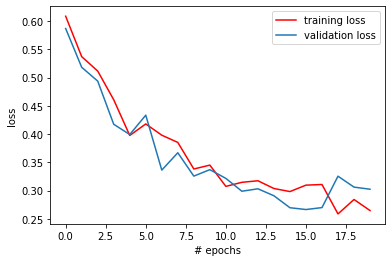

In [20]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

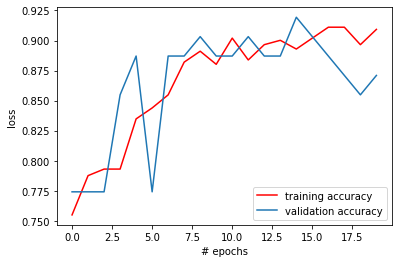

In [21]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [22]:
print(model.evaluate(test_data,test_target))

3/3 [==============================] - 0s 91ms/step - loss: 0.4283 - accuracy: 0.8696
[0.42830535769462585, 0.8695651888847351]
